## Kamada-Kawai layout in igraph, graphviz and networkx illustrated by Plotly plots of the Coauthorship Network of Scientists ##

In this Jupyter Notebook we plot for comparison the graph representing the Couauthorship Network of Scientists, with Kamada-Kawada (KK) layout implemented in the Python packages `igraph`, `py/graphviz`, respectively `networkx`. 


### Coauthorship network as an instance of the igraph.Graph class ###

In [1]:
import igraph as ig
print ig.__version__

0.7.1


The graph data are read from a `gml` file, posted at  [UC Irvine Network Data Repository](http://networkdata.ics.uci.edu/data/netscience/netscience.gml):

In [2]:
G=ig.Graph.Read_GML('netscience.gml')
labels=list(G.vs['label'])
N=len(labels)
V=range(N)

In [3]:
labels[:2]

['ABRAMSON, G', 'KUPERMAN, M']

In [4]:
E=[e.tuple for e in G.es]# list of edges
E[:10]

[(0, 1),
 (2, 3),
 (2, 4),
 (3, 4),
 (2, 5),
 (3, 5),
 (4, 5),
 (2, 6),
 (3, 6),
 (4, 6)]

In [13]:
layt=G.layout('kk') #kamada-kawai

In [14]:
layt[:2]

[[-17.34473341253675, 21.80730073072406],
 [-17.250520577281186, 20.80520290058109]]

In [15]:
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot
init_notebook_mode(connected=True)

Define data for the Plotly plot:

In [16]:
def get_plotly_data(E, coords):
    # E is the list of tuples representing the graph edges
    # coords is the list of node coordinates 
    N=len(coords)
    Xnodes=[coords[k][0] for k in range(N)]# x-coordinates of nodes
    Ynodes=[coords[k][1] for k in range(N)]# y-coordnates of nodes

    Xedges=[]
    Yedges=[]
    for e in E:
        Xedges.extend([coords[e[0]][0], coords[e[1]][0], None])# x coordinates of the nodes defining the edge e
        Yedges.extend([coords[e[0]][1], coords[e[1]][1], None])# y - " - 
        
    return Xnodes, Ynodes, Xedges, Yedges 

def get_node_trace(x, y, labels, marker_size=5, marker_color='#6959CD', line_color='rgb(50,50,50)', line_width=0.5):
    return dict(type='scatter',
                x=x,
                y=y,
                mode='markers',
                marker=dict(symbol='dot',
                            size=marker_size, 
                            color=marker_color,
                            line=dict(color=line_color, width=line_width)
                             ),
            text=labels,
            hoverinfo='text'
               )
def get_edge_trace(x, y, linecolor='rgb(210,210,210)', linewidth=1):
    return dict(type='scatter',
                x=x,
                y=y,
                mode='lines',
                line=dict(color=linecolor, width=linewidth),
                hoverinfo='none'
               )
    

In [17]:
Xn, Yn, Xe, Ye=get_plotly_data(E, layt)
trace1=get_edge_trace(Xe, Ye)
trace2=get_node_trace(Xn, Yn, labels)

Set the plot layout (don't confuse with graph layout!!!):

In [18]:
axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title='' 
          )

In [52]:
title1= "Coauthorship network of scientists working on network theory and experiment"+\
            "<br>Data source: <a href='https://networkdata.ics.uci.edu/data.php?id=11'> [1]</a>"  
width=800
height=800
layout=dict(title=title1,
            font= dict(size=12),
            showlegend=False,
            autosize=False,
            width=width,
            height=height,
            xaxis=dict(axis),
            yaxis=dict(axis),          
            hovermode='closest',
            annotations=([dict(showarrow=False, 
                               text='igraph Kamada-Kawai layout',  
                               xref='paper',     
                               yref='paper',     
                               x=0,  
                               y=-0.1,  
                               xanchor='left',   
                               yanchor='bottom',  
                               font=dict(size=14)     
                              )
                        ]),           
            )


In [53]:
fig1=dict(data=[trace1, trace2], layout=layout)
iplot(fig1)

Display the number of weak connected components in this graph:

In [21]:
len(G.clusters( mode='weak'))

396

### Coauthorship network as an instance of the  pygraphviz.AGraph class ###

In [22]:
import pygraphviz
pygraphviz.__version__

'1.3.1'

In [23]:
import pygraphviz as pgv

In [25]:
g=pgv.AGraph(strict=True, directed=False)
g.add_nodes_from(V)
g.add_edges_from(E)
g.layout(prog='neato') 

In [26]:
g.nodes()[:4]

[u'0', u'1', u'1084', u'946']

In [27]:
g.get_node(0).attr['pos']

u'-888.25,-354.74'

In [29]:
def get_node_coordinates(g):
    #convert the string containing the node coordinates to a list of two floats
    #returns the list of lists of node coordinates
    if  not isinstance(g, pgv.AGraph):
        raise ValueError('The graph g must be a pygraphviz AGraph')
    N=len(g.nodes())    
    coords=[]
    for k in range(N):
        s=g.get_node(k).attr['pos']
        t=s.split(",")
        coords.append(map(float, t))
    return coords  

In [30]:
pgvlayt=get_node_coordinates(g)
pgvlayt[:4]

[[-888.25, -354.74], [-838.21, -301.97], [-118.06, 973.34], [-123.24, 1025.1]]

In [31]:
Xnode, Ynode, Xedge, Yedge=get_plotly_data(E, pgvlayt)
trace3=get_edge_trace(Xedge, Yedge)
trace4=get_node_trace(Xnode, Ynode, labels)

In [32]:
annot2="Graphviz neato layout"

In [54]:
fig2=dict(data=[trace3, trace4], layout=layout)
fig2['layout']['annotations'][0]['text']=annot2
iplot(fig2)

### Coauthorship network as an instance of the networkx.Graph class###

In [34]:
import networkx as nx

In [35]:
nx.__version__

'2.0'

We don't read the gml file again, because we instantiate the class `nx.Graph` with the lists of nodes V,
and edges, E, already set up.

In [36]:
#H=nx.read_gml('netscience.gml')# 

In [37]:
H=nx.Graph()
H.add_nodes_from(V)
H.add_edges_from(E)

In [38]:
type(H.nodes())

networkx.classes.reportviews.NodeView

In [39]:
list(H.nodes())[:2]

[0, 1]

In [40]:
list(H.edges())[:10]

[(0, 1),
 (0, 1084),
 (1, 946),
 (1, 1084),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5)]


Get the node positions:

In [41]:
pos=nx.kamada_kawai_layout(H) 
type(pos)

dict

In [42]:
nodes=pos.keys()

Define data for the  Plotly plot:

In [43]:
Xv=[pos[node][0] for node in nodes]
Yv=[pos[node][1] for node in nodes]
Xed=[]
Yed=[]
for edge in H.edges():
    Xed.extend([pos[edge[0]][0],pos[edge[1]][0], None])
    Yed.extend([pos[edge[0]][1],pos[edge[1]][1], None]) 

In [44]:
trace5=get_edge_trace(Xed, Yed)
trace6=get_node_trace(Xv, Yv, labels)

In [45]:
annot3="Networkx Kamada-Kawai layout"


In [55]:
fig3=dict(data=[trace5, trace6], layout=layout)
fig3['layout'].update(width=1000, height=1000)
fig3['layout']['annotations'][0]['text']=annot3
iplot(fig3)

Let us plot the nx graph via matplotlib, too, to see whether  our Plotly implementation is a good one:

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
plt.rcParams['figure.figsize'] = 10, 10

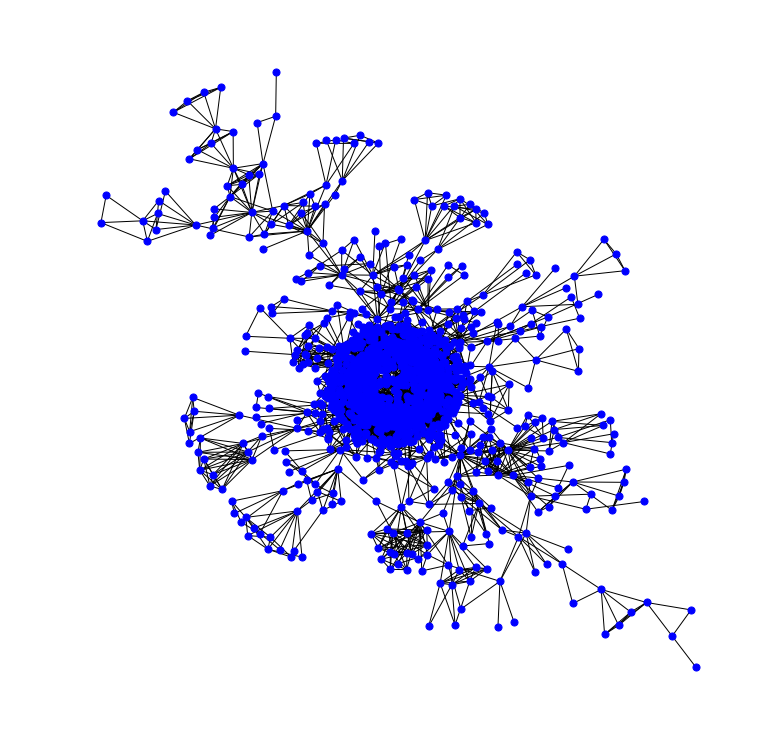

In [49]:
nx.draw(H, pos, node_color='b', node_size=50, with_labels=False)

The two plots are identical, up to a scaling factor. 

Inspect the number of connected components computed via networkx:

In [50]:
print nx.number_connected_components(H)

396


**Conclusion**

The networks defined as instances of the graph classes provided by  the three Python packages, and displayed with the same KK layout, are quite different. To avoid any doubt, we instantiated the class `pygraphvix.AGraph`, and the `networkx.Graph` from the same lists of nodes, V, and edges, E, extracted from the `igraph.Graph`, G.
    
- Zooming the igraph graph we notice that singleton  nodes are located almost circular on an arc of circle
surrounding most of the complementary nodes.

- The `pygraphviz` `neato` layout seems to display in the similar way the multi-node connected components of the graph, but here the singleton nodes are placed around a square bounding the graph.

- At the first sight the `networkx` displays a connected graph. We cannot see any singleton in the graph plot.
The multi-node connected components are indistinguishable, although the total number of connected components is the same as the number reported by the method `clusters`, called for the `igraph.Graph`, G. Something went wrong...

In this  [notebook](http://nbviewer.jupyter.org/github/empet/Networks/blob/master/kk-layout-in-3-packages-zika.ipynb) we perform the same experiment  with a connected graph.

In [1]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()